In [70]:
import pandas as pd

In [71]:
df = pd.read_csv("df_final.csv")

C:\Users\X415\AppData\Local\Temp\ipykernel_11676\125706528.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_final.csv")


In [72]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [73]:
duplicates = df.duplicated()
if duplicates.any():
    df.drop_duplicates(inplace=True)

In [74]:
#Optimisation des types
df['code_postal'] = df['code_postal'].astype('category')
df['region'] = df['region'].astype('category')
df['departement'] = df['departement'].astype('category')
df['grand_secteur_d_activite'] = df['grand_secteur_d_activite'].astype('category')
df['secteur_na17'] = df['secteur_na17'].astype('category')
df['secteur_na38'] = df['secteur_na38'].astype('category')
df['secteur_na88'] = df['secteur_na88'].astype('category')
df['année'] = df['année'].astype('int32')

# Nan puis type
df['nb_effectif'] = df['nb_effectif'].fillna(0).astype('int')
df['nb_effectif_total'] = df['nb_effectif_total'].fillna(0).astype('int')
df['nb_entreprise'] = df['nb_entreprise'].fillna(0).astype('int')
df['nb_entreprise_total'] = df['nb_entreprise_total'].fillna(0).astype('int')






C:\Users\X415\AppData\Local\Temp\ipykernel_11676\1882999062.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_sector_data = df.groupby(['region', 'secteur_na88'])[['nb_entreprise']].sum().unstack().fillna(0)


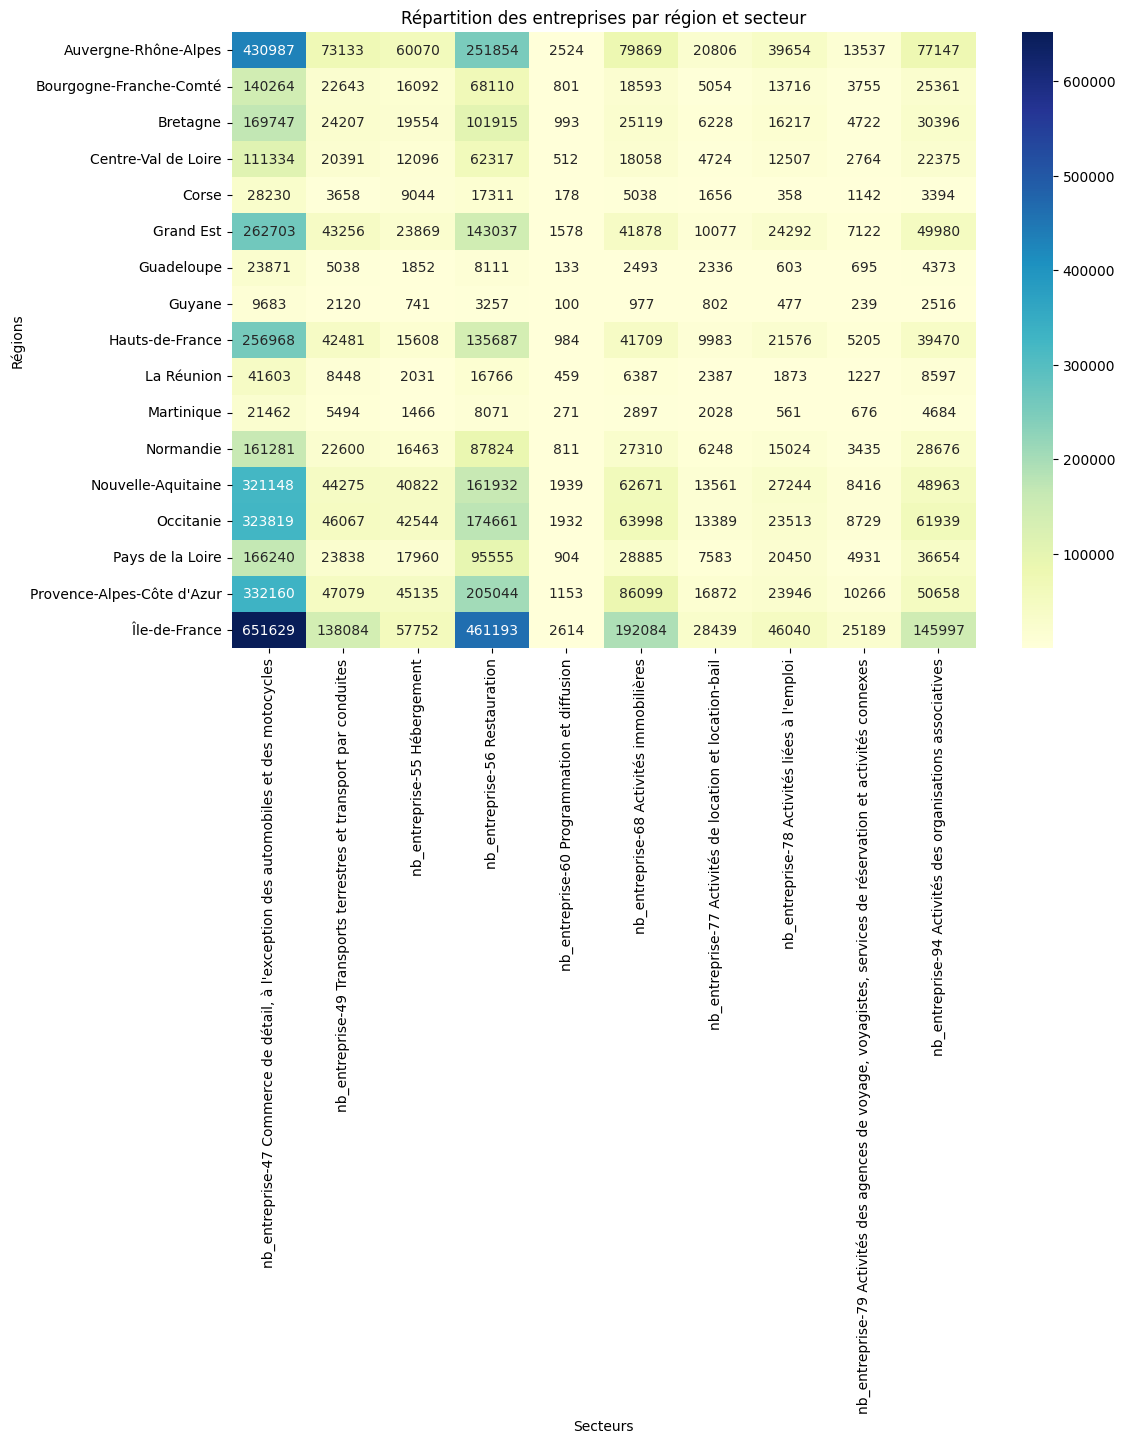

In [80]:
region_sector_data = df.groupby(['region', 'secteur_na88'])[['nb_entreprise']].sum().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(region_sector_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Répartition des entreprises par région et secteur")
plt.xlabel("Secteurs")
plt.ylabel("Régions")
plt.show()


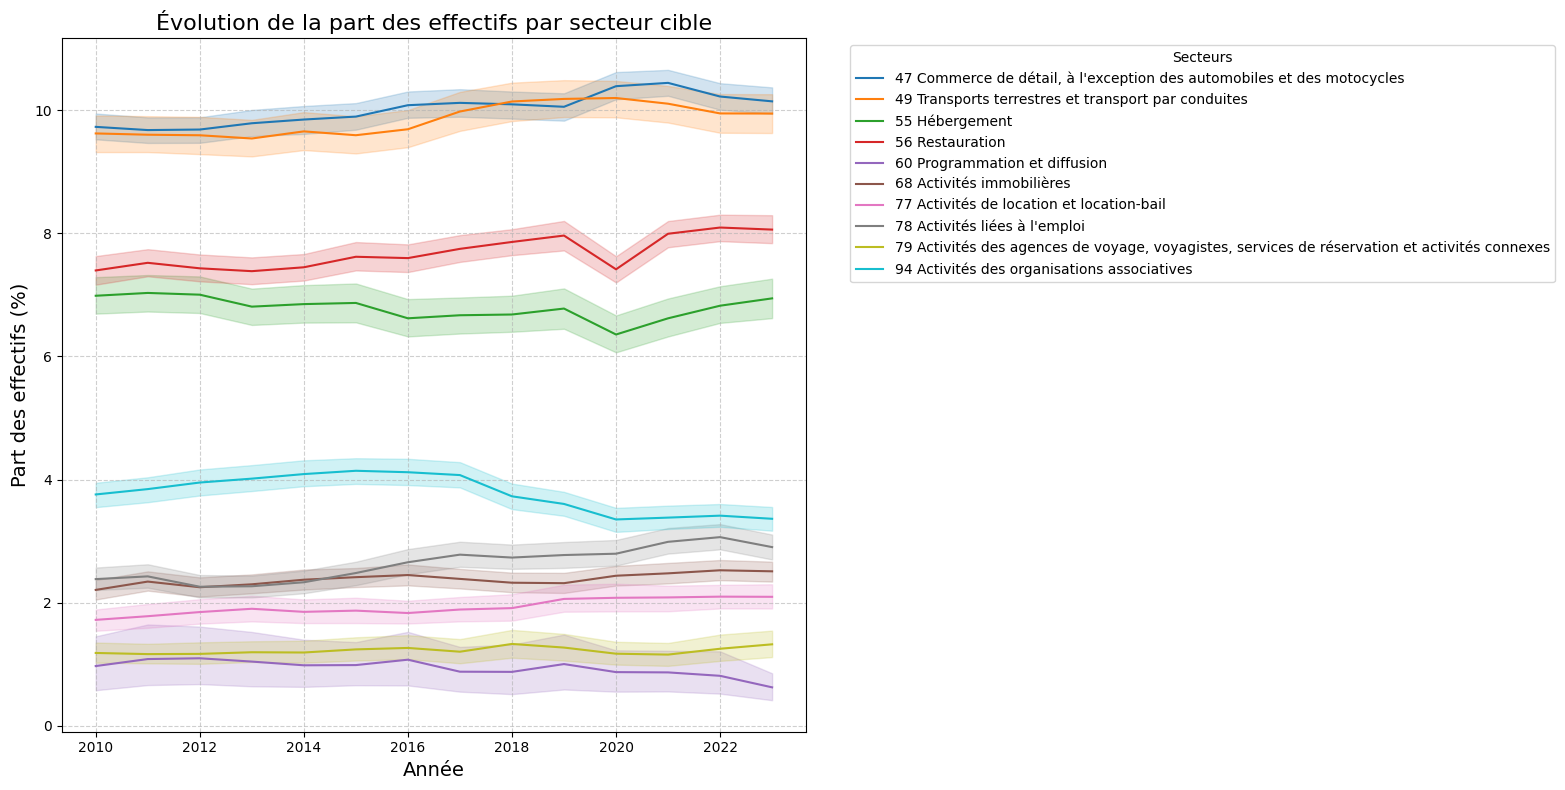

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Tracer la visualisation
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df, 
    x='année', 
    y='%_effectif', 
    hue='secteur_na88', 
    palette='tab10'
)
plt.title("Évolution de la part des effectifs par secteur cible", fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Part des effectifs (%)", fontsize=14)
plt.legend(title="Secteurs", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


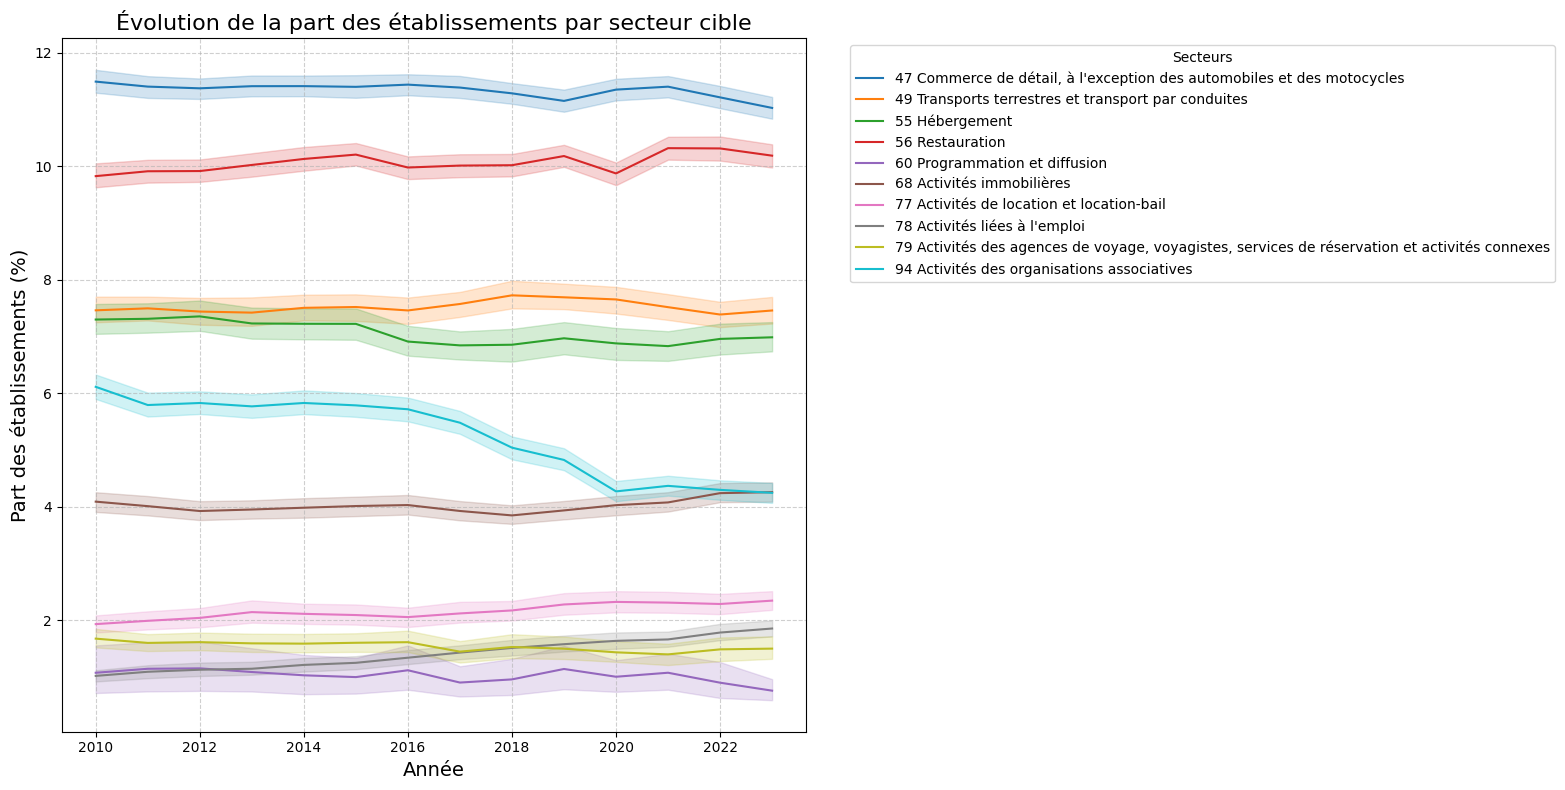

In [ ]:


# Tracer la visualisation
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df, 
    x='année', 
    y='%_entreprise', 
    hue='secteur_na88', 
    palette='tab10'
)
plt.title("Évolution de la part des établissements par secteur cible", fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Part des établissements (%)", fontsize=14)
plt.legend(title="Secteurs", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Filtrer uniquement les données du Pas-de-Calais
df_pas_de_calais = df[df['departement'] == 'Pas-de-Calais']


In [ ]:
# Colonnes originales à conserver
cols_to_keep = [
    'ville', 'code_postal', 'region', 'departement', 
    'année', 'grand_secteur_d_activite', 'secteur_na17', 
    'secteur_na38', 'secteur_na88', 
    'nb_effectif', 'nb_effectif_total','%_effectif', 
    'nb_entreprise', 'nb_entreprise_total','%_entreprise'
]

# Garder uniquement les colonnes nécessaires
df = df[cols_to_keep]

# Vérification du DataFrame final
df.head()


"""
# Calcul du Score Sectoriel
Ce script calcule un score sectoriel basé sur plusieurs paramètres, permettant d'évaluer le dynamisme économique d'un secteur.

## Composantes du score :
1. **Part des effectifs** : Part des effectifs du secteur par rapport au total des effectifs.
2. **Part des établissements** : Part des établissements du secteur par rapport au total des établissements.
3. **Taux de croissance** : Variation relative des effectifs et établissements d'une année sur l'autre.
4. **Indice de localisation** : Mesure de la concentration d'un secteur dans une région par rapport à la moyenne nationale.
5. **Taux de nouvelles entreprises** : Proportion des entreprises créées par rapport au total d'entreprises dans le secteur.

## Formule du score sectoriel :
Le score est une moyenne pondérée des différentes composantes :


In [104]:
import pandas as pd
import numpy as np

# Calcul des parts des effectifs et des entreprises
df['part_effectifs'] = df['nb_effectif'] / df['nb_effectif_total']
df['part_entreprises'] = df['nb_entreprise'] / df['nb_entreprise_total']


# Poids des composantes
poids_effectifs = 0.5
poids_entreprises = 0.5

# Calcul du score brut (non normalisé)
df['score_sectoriel_raw'] = (
    (poids_effectifs * df['part_effectifs']) +
    (poids_entreprises * df['part_entreprises']) 
)

# Normalisation min-max pour obtenir des scores entre 0 et 1
min_score = df['score_sectoriel_raw'].min()
max_score = df['score_sectoriel_raw'].max()

df['score_sectoriel'] = (df['score_sectoriel_raw'] - min_score) / (max_score - min_score)

# Supprimer la colonne intermédiaire
df.drop(columns=['score_sectoriel_raw','part_effectifs','part_entreprises'], inplace=True)

# Vérification du DataFrame final
print(df[['ville', 'année', 'secteur_na88', 'score_sectoriel']].head())


        ville  année                                       secteur_na88  \
0  Abainville   2010  47 Commerce de détail, à l'exception des autom...   
1  Abainville   2011  47 Commerce de détail, à l'exception des autom...   
2  Abainville   2012  47 Commerce de détail, à l'exception des autom...   
3  Abainville   2013  47 Commerce de détail, à l'exception des autom...   
4  Abainville   2014  47 Commerce de détail, à l'exception des autom...   

   score_sectoriel  
0         0.083477  
1         0.095833  
2         0.104423  
3         0.062346  
4         0.063158  


In [ ]:
# Calcul du taux de croissance des effectifs et des entreprises
df.sort_values(by=['ville', 'secteur_na88', 'année'], inplace=True)  # Assurer un tri chronologique
croissance_effectifs = df.groupby(['ville', 'secteur_na88'])['nb_effectif'].pct_change().fillna(0)
croissance_entreprises = df.groupby(['ville', 'secteur_na88'])['nb_entreprise'].pct_change().fillna(0)

# Moyenne nationale pour l'indice de localisation
moyenne_nationale_effectifs = df.groupby('secteur_na88')['nb_effectif'].transform('mean')
indice_localisation = df['nb_effectif'] / moyenne_nationale_effectifs

# Poids des composantes
poids_effectifs = 0.3
poids_entreprises = 0.3
poids_croissance = 0.2
poids_localisation = 0.2

# Calcul du score brut avec les nouveaux paramètres
df['score_sectoriel_raw'] = (
    (poids_effectifs * (df['nb_effectif'] / df['nb_effectif_total'])) +
    (poids_entreprises * (df['nb_entreprise'] / df['nb_entreprise_total'])) +
    (poids_croissance * (croissance_effectifs + croissance_entreprises) / 2) +
    (poids_localisation * indice_localisation)
)

# Normalisation min-max pour obtenir des scores entre 0 et 1
min_score = df['score_sectoriel_raw'].min()
max_score = df['score_sectoriel_raw'].max()
df['score_sectoriel'] = (df['score_sectoriel_raw'] - min_score) / (max_score - min_score)

# Supprimer les colonnes intermédiaires
df.drop(columns=['score_sectoriel_raw'], inplace=True)

# Vérification du DataFrame final
print(df[['ville', 'année', 'secteur_na88', 'score_sectoriel']].head())


C:\Users\X415\AppData\Local\Temp\ipykernel_11676\3448627268.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_moyennes = df.groupby(['secteur_na88', 'année'])['score_sectoriel'].mean().reset_index()


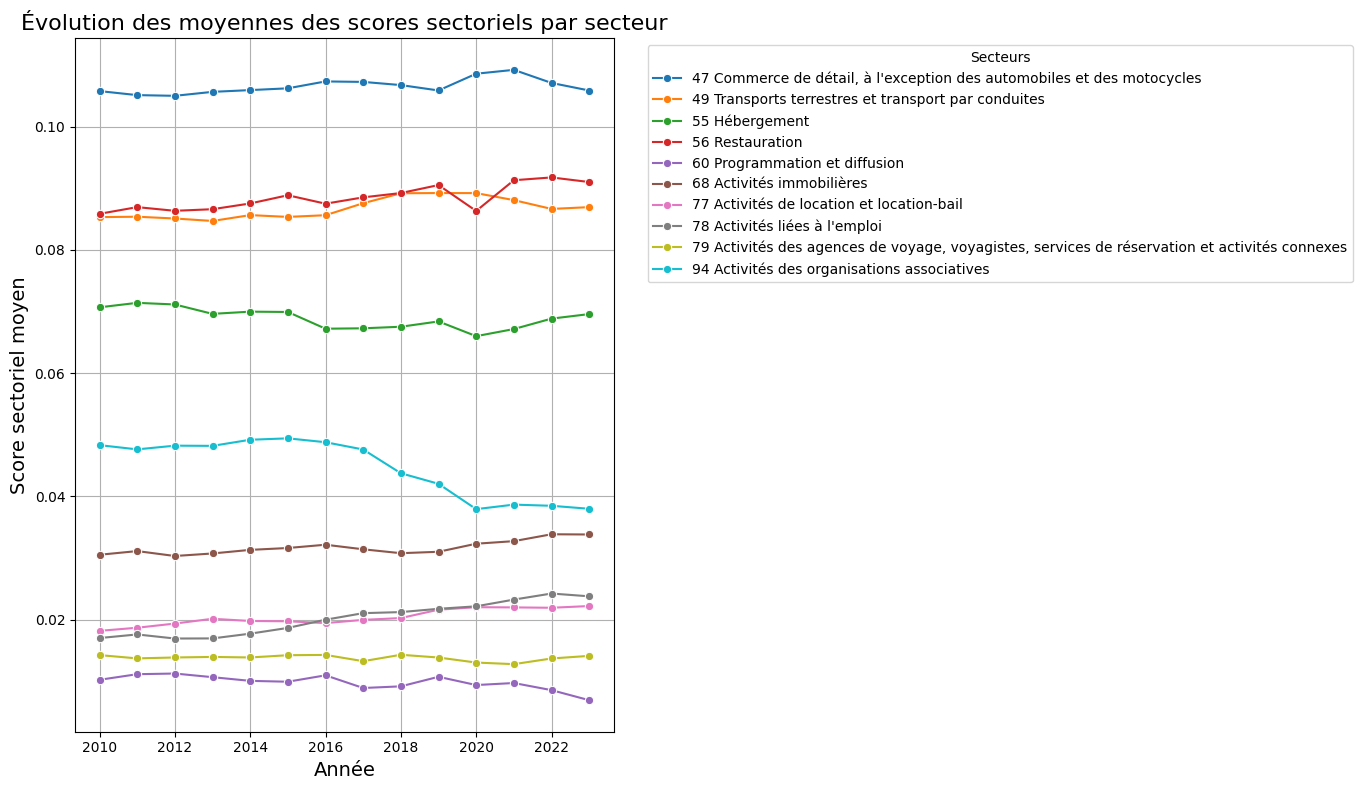

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des moyennes des scores sectoriels par secteur et année
df_moyennes = df.groupby(['secteur_na88', 'année'])['score_sectoriel'].mean().reset_index()

# Visualisation de l'évolution des moyennes des scores sectoriels par secteur
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_moyennes, x='année', y='score_sectoriel', hue='secteur_na88', marker='o')

# Ajustement du graphique
plt.title("Évolution des moyennes des scores sectoriels par secteur", fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Score sectoriel moyen", fontsize=14)
plt.legend(title="Secteurs", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets, Output
import pandas as pd

# Créer un DataFrame d'exemple
# Assurez-vous que df contient les colonnes 'region', 'departement', 'secteur_na88', 'année', et 'score_sectoriel'

# Initialiser la sortie interactive
output = Output()

# Fonction pour tracer le graphique
def plot_sector_for_filters(region, departement, secteur):
    with output:
        output.clear_output(wait=True)
        
        # Filtrer les données selon les choix
        df_filtered = df.copy()

        # Appliquer les filtres
        if region != "Toutes les régions":
            df_filtered = df_filtered[df_filtered['region'] == region]
        if departement != "Tous les départements":
            df_filtered = df_filtered[df_filtered['departement'] == departement]
        if secteur != "Tous les secteurs":
            df_filtered = df_filtered[df_filtered['secteur_na88'] == secteur]

        # Vérifier s'il y a des données
        if df_filtered.empty:
            print("Aucune donnée correspondante pour les critères sélectionnés.")
            return

        # Calculer la moyenne des scores sectoriels par année
        df_moyenne_scores = df_filtered.groupby('année')['score_sectoriel'].mean().reset_index()
        df_moyenne_scores['secteur_na88'] = 'Moyenne des secteurs'

        # Ajouter la moyenne des scores au DataFrame principal pour la visualisation
        df_viz = pd.concat([df_filtered, df_moyenne_scores], ignore_index=True)

        # Création de la figure
        plt.figure(figsize=(20, 6))

        # Tracer les courbes pour les secteurs sélectionnés
        sns.lineplot(
            data=df_viz[df_viz['secteur_na88'] != 'Moyenne des secteurs'],
            x='année',
            y='score_sectoriel',
            hue='secteur_na88',
            marker='o',
            linewidth=1.5,
            legend='full'
        )

        # Personnalisation
        plt.title(f"Évolution des scores sectoriels", fontsize=16)
        plt.xlabel("Année", fontsize=14)
        plt.ylabel("Score sectoriel", fontsize=14)
        plt.legend(title="Secteurs", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Fonction pour mettre à jour les options de départements en fonction de la région sélectionnée
def update_departements_options(change):
    selected_region = change['new']
    if selected_region == "Toutes les régions":
        departements_dropdown.options = ["Tous les départements"] + list(df['departement'].unique())
        departements_dropdown.value = "Tous les départements"
    else:
        departements_region = df[df['region'] == selected_region]['departement'].unique()
        departements_dropdown.options = ["Tous les départements"] + list(departements_region)
        departements_dropdown.value = "Tous les départements"

# Fonction pour mettre à jour la région lorsque le département est sélectionné
def update_region_selection(change):
    selected_departement = change['new']
    if selected_departement != "Tous les départements":
        corresponding_region = df[df['departement'] == selected_departement]['region'].iloc[0]
        regions_dropdown.value = corresponding_region

# Créer des listes uniques pour les régions, départements et secteurs
regions_disponibles = ["Toutes les régions"] + list(df['region'].unique())
departements_disponibles = ["Tous les départements"] + list(df['departement'].unique())
secteurs_disponibles = ["Tous les secteurs"] + list(df['secteur_na88'].unique())

# Widgets interactifs
regions_dropdown = widgets.Dropdown(
    options=regions_disponibles,
    value="Toutes les régions",
    description="Région :"
)

departements_dropdown = widgets.Dropdown(
    options=departements_disponibles,
    value="Tous les départements",
    description="Département :"
)

secteurs_dropdown = widgets.Dropdown(
    options=secteurs_disponibles,
    value="Tous les secteurs",
    description="Secteur :"
)

# Attacher les callbacks
regions_dropdown.observe(update_departements_options, names='value')
departements_dropdown.observe(update_region_selection, names='value')

# Créer l'interface interactive
interactive_plot = interact(
    plot_sector_for_filters,
    region=regions_dropdown,
    departement=departements_dropdown,
    secteur=secteurs_dropdown
)

# Afficher le tout
display(interactive_plot, output)


interactive(children=(Dropdown(description='Région :', options=('Toutes les régions', 'Grand Est', 'Hauts-de-F…

<function __main__.plot_sector_for_filters(region, departement, secteur)>

Output()